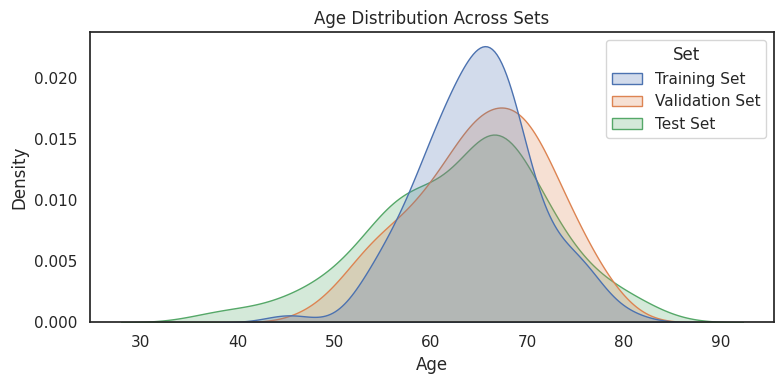

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
datasets = ['Training Set', 'Validation Set', 'Test Set']
age_means = [64.40, 65.41, 63.03]
age_stds = [7.04, 7.42, 7.69]

# Creating DataFrame for age visualization
age_data = pd.DataFrame({
    'Age': np.concatenate([np.random.normal(mean, std, 100) for mean, std in zip(age_means, age_stds)]),
    'Set': np.repeat(datasets, 100)
})

# Visualization for Age Distribution
plt.figure(figsize=(8, 4))  # Define a single figure with custom size

# Plotting the age distribution
sns.kdeplot(data=age_data, x='Age', hue="Set", fill=True)
plt.title('Age Distribution Across Sets')  # Set the title for the plot
plt.grid(False)  # Optionally, remove the grid for a cleaner look

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plot


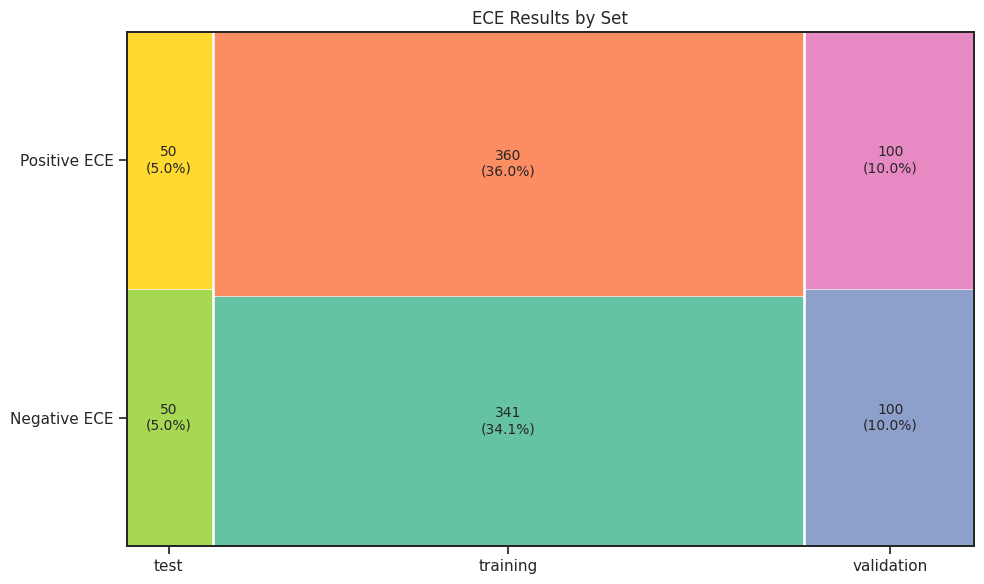

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Load the dataset
# Make sure to upload your file to Colab or mount your Google Drive to access the file
data_path = 'TotalData.xlsx'  # Update this path if your file is in Google Drive
data = pd.read_excel(data_path)

# Map the 'Pathology' column to 'Negative ECE' and 'Positive ECE'
data['ECE Category'] = data['Pathology'].map({'Non_T3': 'Negative ECE', 'Non_T2': 'Negative ECE', 'Yes_T3': 'Positive ECE'})

# Calculate counts for each combination of set and ECE category
mosaic_counts = data.groupby(['Set', 'ECE Category']).size().to_dict()

# Define the color palette for the sets
set_palette = sns.color_palette("Set2")

# Mapping for the sets to the palette
color_mapping = {
    'Training Negative': set_palette[0],
    'Training Positive': set_palette[1],
    'Validation Negative': set_palette[2],
    'Validation Positive': set_palette[3],
    'Test Negative': set_palette[4],
    'Test Positive': set_palette[5]
}

# Define properties for each category with sophisticated colors
props = {
    ('training', 'Negative ECE'): {'color': color_mapping['Training Negative']},
    ('training', 'Positive ECE'): {'color': color_mapping['Training Positive']},
    ('validation', 'Negative ECE'): {'color': color_mapping['Validation Negative']},
    ('validation', 'Positive ECE'): {'color': color_mapping['Validation Positive']},
    ('test', 'Negative ECE'): {'color': color_mapping['Test Negative']},
    ('test', 'Positive ECE'): {'color': color_mapping['Test Positive']}
}

# Function to create labels that show both count and percentage
def labelizer(key):
    count = mosaic_counts[key]
    total = sum(mosaic_counts.values())
    percentage = (count / total) * 100
    return f"{count}\n({percentage:.1f}%)"

# Create the plot with the new labelizer function and properties
fig, ax = plt.subplots(figsize=(10, 6))
mosaic(mosaic_counts, properties=props, ax=ax, labelizer=labelizer)
ax.set_title('ECE Results by Set')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

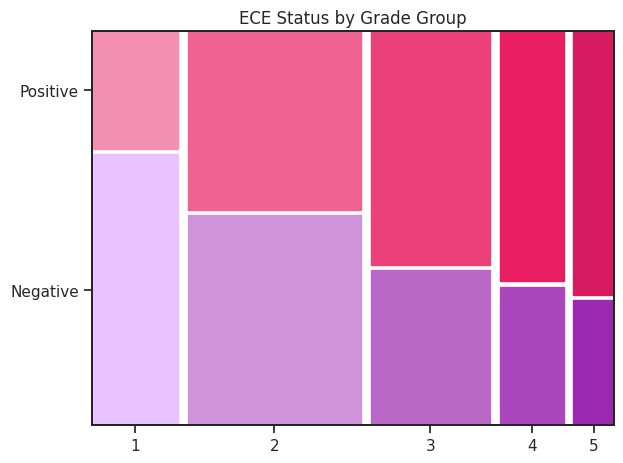

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Load your dataset
data_path = '/content/data.txt'  # Update this path accordingly
data = pd.read_csv(data_path, sep='\t')

# Extracting ECE status from the 'Name' column
data['ECE_Status'] = data['Name'].apply(lambda x: 'Positive' if 'Y' in x else 'Negative')

# Create a contingency table for ISUP Grade Group and ECE Status
contingency_table = pd.crosstab(data['Preop ISUP Grade Group'], data['ECE_Status'])

# Define a custom palette with pink and purple tones
palette = ['#e9c3ff', '#f48fb1',  # Purple to Pink for one grade group
           '#ce93d8', '#f06292',  # Another shade of Purple to Pink
           '#ba68c8', '#ec407a',  # And so on...
           '#ab47bc', '#e91e63',
           '#9c27b0', '#d81b60']
# Ensure the palette has enough colors for all combinations
palette = palette * ((contingency_table.shape[0] * 2) // len(palette) + 1)

# Define properties for each cell in the mosaic plot. This remains unchanged.
def properties(key):
    idx = (int(key[0]) - 1) * 2  # Adjust the index for color mapping
    if key[1] == 'Positive':
        idx += 1
    return {'color': palette[idx]}

# Modify the labelizer function to return an empty string, effectively removing labels from the plot
def labelizer(key):
    return ''

# Set the font size for the plot
font_size = 12  # You can adjust this value as needed

# Generate the mosaic plot without internal labels
plt.figure(figsize=(10, 10))
mosaic(contingency_table.stack(), gap=0.02, properties=properties, labelizer=labelizer,
       title='ECE Status by Grade Group')
plt.rcParams.update({'font.size': font_size})  # Update the font size for the plot
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


1.2.2
3.7.1
Accuracy: 0.6611295681063123


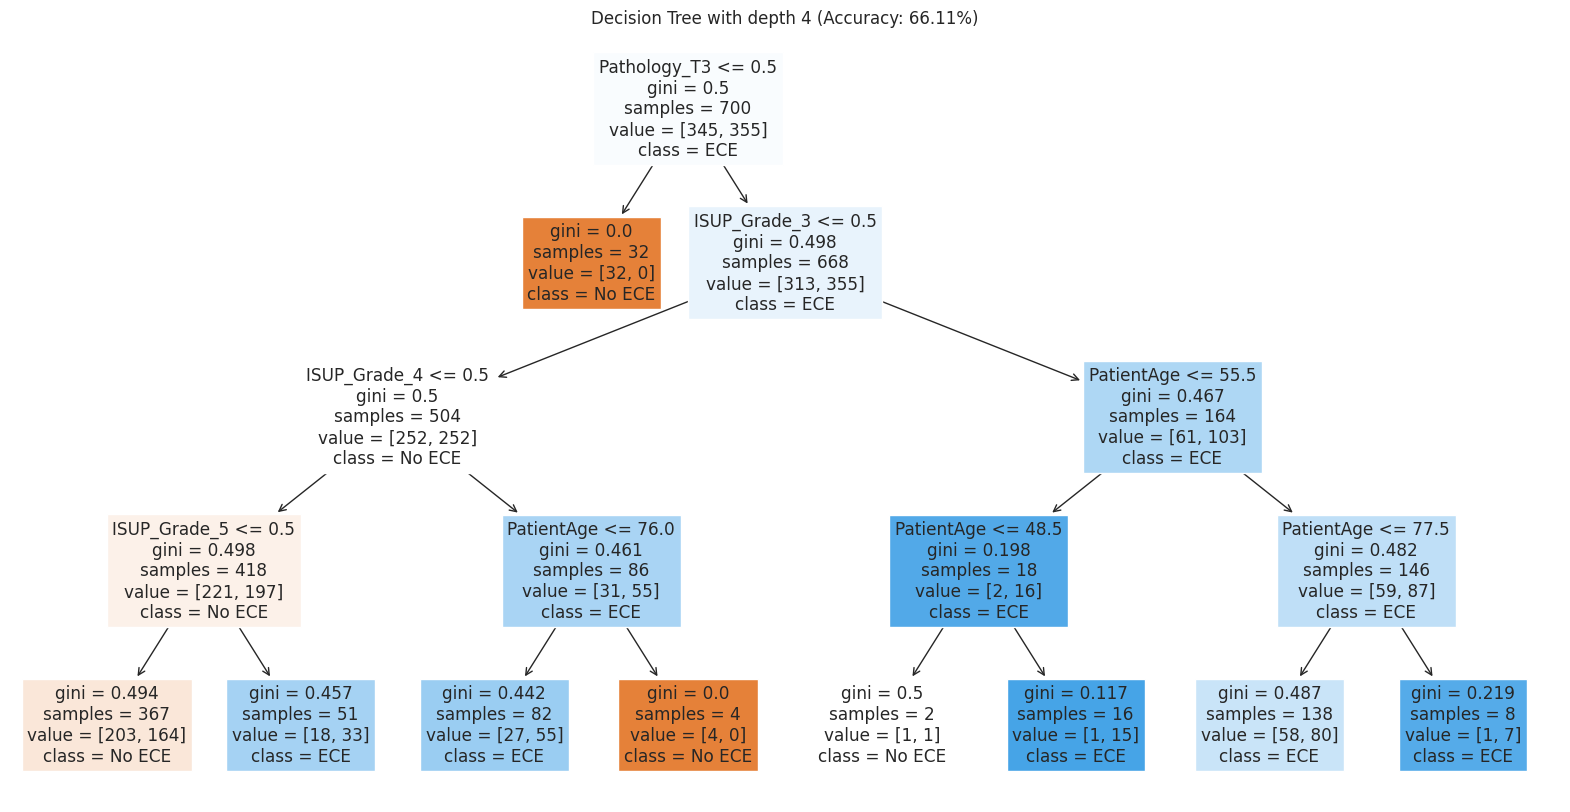

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

import sklearn
import matplotlib

print(sklearn.__version__)
print(matplotlib.__version__)

# To update:
# !pip install -U scikit-learn matplotlib


# Load the dataset (make sure to upload your data.xlsx file to Colab first)
data = pd.read_excel('/content/data_dt.xlsx')

# Convert 'ECE Result' to binary (0 and 1)
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})

# One-hot encode 'Preop ISUP Grade Group' and 'Pathology'
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X_pathology = pd.get_dummies(data['Pathology'], prefix='Pathology', drop_first=True)

# Combine features
X = pd.concat([data[['PatientAge']], X_grade_group, X_pathology], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize the decision tree
plt.figure(figsize=(20, 10))
feature_names = list(X.columns)
tree.plot_tree(
    dt_classifier,
    filled=True,
    feature_names=feature_names,
    class_names=['No ECE', 'ECE'],
    proportion=False
)
plt.title(f'Decision Tree with depth 4 (Accuracy: {accuracy:.2%})')

# Save the figure to a PDF file
plt.savefig('/content/decision_tree_visualization.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
data_path = '/content/data_dt.xlsx'  # Change this to the correct path in your environment
data = pd.read_excel(data_path)

# Convert 'ECE Result' to binary (0 and 1)
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})

# One-hot encode 'Preop ISUP Grade Group' and 'Pathology'
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X_pathology = pd.get_dummies(data['Pathology'], prefix='Pathology', drop_first=True)

# Combine features
X = pd.concat([data[['PatientAge']], X_grade_group, X_pathology], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# Recursive function to print all decision paths of the decision tree
def print_all_decision_paths(node, depth, feature_names, class_names, decision_tree):
    indent = "  " * depth
    # Check if we have a leaf
    if decision_tree.children_left[node] == -1:
        leaf_value = decision_tree.value[node][0]
        # Determine class by the dominant label in this leaf
        predicted_class = class_names[np.argmax(leaf_value)]
        print(f"{indent}Predict: {predicted_class} (value = {leaf_value})")
    else:
        # Print the decision rule at this node
        feature = feature_names[decision_tree.feature[node]]
        threshold = decision_tree.threshold[node]
        # Left side (less than or equal to threshold)
        print(f"{indent}if {feature} <= {threshold:.2f}:")
        print_all_decision_paths(decision_tree.children_left[node], depth + 1,
                                 feature_names, class_names, decision_tree)
        # Right side (greater than threshold)
        print(f"{indent}else:  # if {feature} > {threshold:.2f}")
        print_all_decision_paths(decision_tree.children_right[node], depth + 1,
                                 feature_names, class_names, decision_tree)

# Feature names and class names
feature_names = list(X_train.columns)
class_names = ["No ECE", "ECE"]

# Call the function on the root node
print("Decision Tree Rules:")
print_all_decision_paths(0, 0, feature_names, class_names, dt_classifier.tree_)


Decision Tree Rules:
if Pathology_T3 <= 0.50:
  Predict: No ECE (value = [32.  0.])
else:  # if Pathology_T3 > 0.50
  if ISUP_Grade_3 <= 0.50:
    if ISUP_Grade_4 <= 0.50:
      if ISUP_Grade_5 <= 0.50:
        Predict: No ECE (value = [203. 164.])
      else:  # if ISUP_Grade_5 > 0.50
        Predict: ECE (value = [18. 33.])
    else:  # if ISUP_Grade_4 > 0.50
      if PatientAge <= 76.00:
        Predict: ECE (value = [27. 55.])
      else:  # if PatientAge > 76.00
        Predict: No ECE (value = [4. 0.])
  else:  # if ISUP_Grade_3 > 0.50
    if PatientAge <= 55.50:
      if PatientAge <= 48.50:
        Predict: No ECE (value = [1. 1.])
      else:  # if PatientAge > 48.50
        Predict: ECE (value = [ 1. 15.])
    else:  # if PatientAge > 55.50
      if PatientAge <= 77.50:
        Predict: ECE (value = [58. 80.])
      else:  # if PatientAge > 77.50
        Predict: ECE (value = [1. 7.])


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.60, AUC: 0.67
Random Forest - Accuracy: 0.64, AUC: 0.67
XGBoost - Accuracy: 0.63, AUC: 0.66


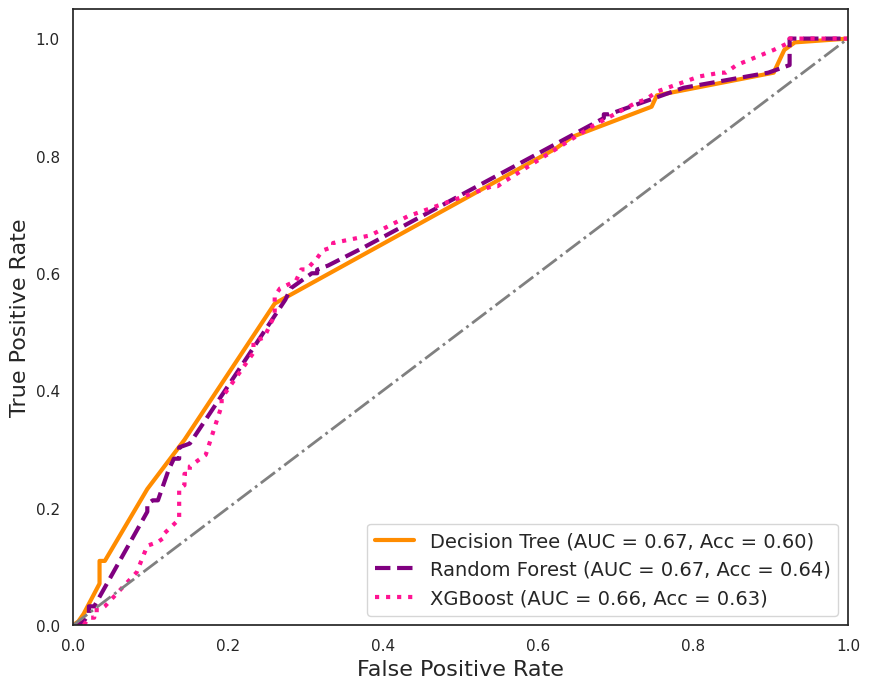

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_excel('/content/data_dt.xlsx')

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X_pathology = pd.get_dummies(data['Pathology'], prefix='Pathology', drop_first=True)
X = pd.concat([data[['PatientAge']], X_grade_group, X_pathology], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grids
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
best_dt_classifier = dt_random_search.best_estimator_

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
best_rf_classifier = rf_random_search.best_estimator_

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_classifier = xgb_random_search.best_estimator_

# Get predicted probabilities and compute ROC AUC for each classifier
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend

# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-total.pdf', format='pdf', bbox_inches='tight')
plt.show()


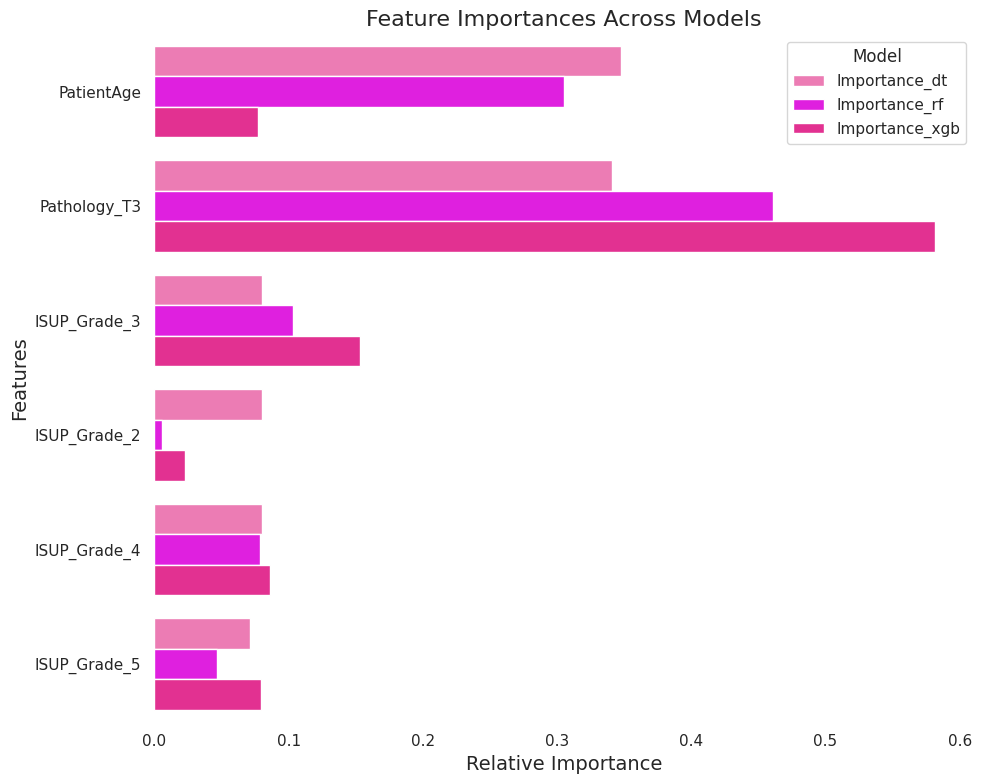

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette
palette = {
    'Importance_dt': 'hotpink',
    'Importance_rf': 'magenta',
    'Importance_xgb': 'deeppink'
}

# Plot
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=16)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.legend(title='Model', loc='upper right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_total.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.53, AUC: 0.51
Random Forest - Accuracy: 0.43, AUC: 0.56
XGBoost - Accuracy: 0.60, AUC: 0.54


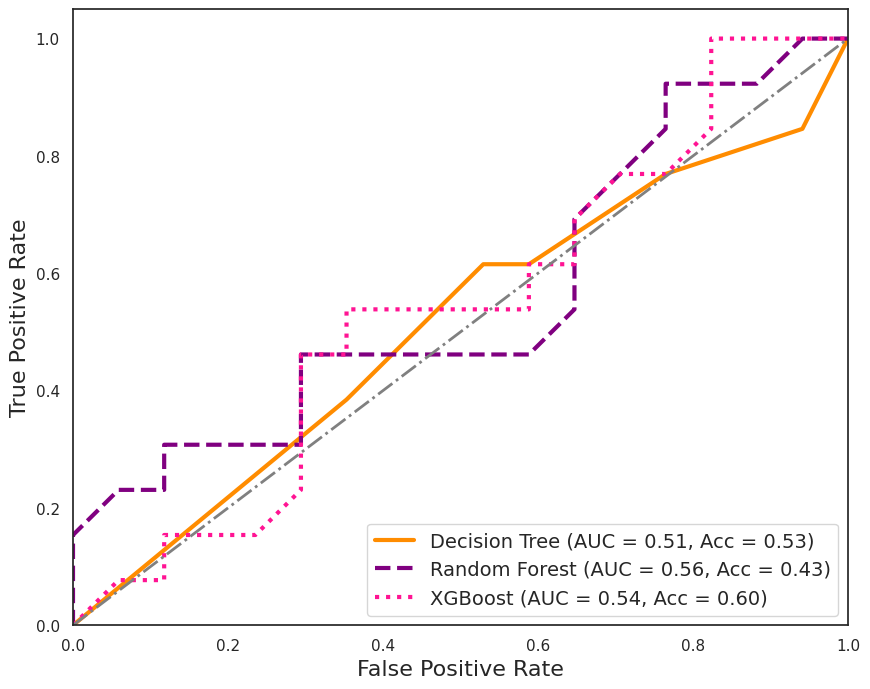

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_excel('/content/data_outAI.xlsx')

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X_pathology = pd.get_dummies(data['Pathology'], prefix='Pathology', drop_first=True)
X = pd.concat([data[['PatientAge']], X_grade_group, X_pathology], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grids
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
best_dt_classifier = dt_random_search.best_estimator_

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
best_rf_classifier = rf_random_search.best_estimator_

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_classifier = xgb_random_search.best_estimator_

# Get predicted probabilities and compute ROC AUC for each classifier
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend

# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-outAI.pdf', format='pdf', bbox_inches='tight')
plt.show()


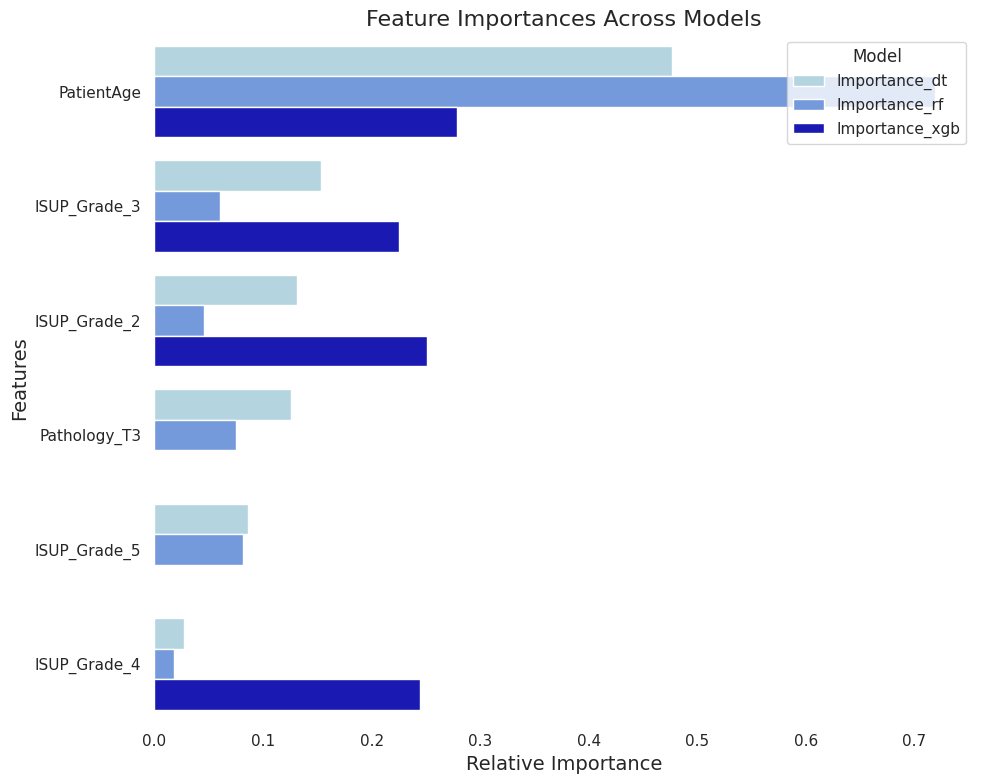

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette in shades of blue
palette = {
    'Importance_dt': 'lightblue',  # A light blue color
    'Importance_rf': 'cornflowerblue',  # A medium blue color
    'Importance_xgb': 'mediumblue'  # A darker blue color
}

# Plot
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=16)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.legend(title='Model', loc='upper right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_outAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.70, AUC: 0.71
Random Forest - Accuracy: 0.60, AUC: 0.65
XGBoost - Accuracy: 0.57, AUC: 0.64


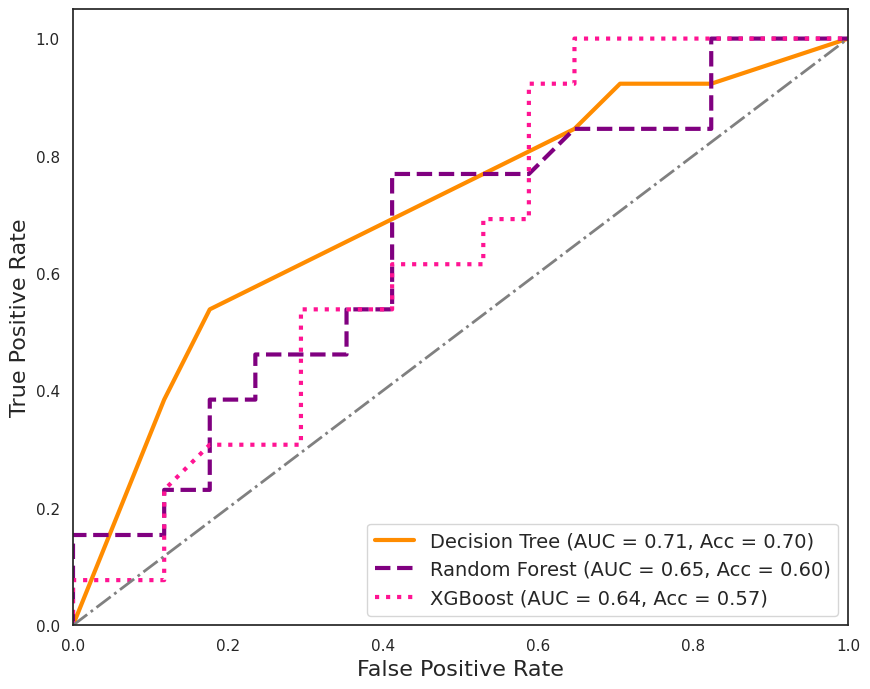

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_excel('/content/data_inAI.xlsx')  # Adjusted the path to the uploaded file

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
# Ensure the original column is 'ECE Result', if not, adjust accordingly.
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
X_pathology = pd.get_dummies(data['Pathology'], prefix='Pathology', drop_first=True)

# Include the 'Prediction by AI' feature along with other features
X = pd.concat([data[['Prediction by AI', 'PatientAge']], X_grade_group, X_pathology], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grids for each classifier
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Extract best estimators
best_dt_classifier = dt_random_search.best_estimator_
best_rf_classifier = rf_random_search.best_estimator_
best_xgb_classifier = xgb_random_search.best_estimator_

# Predict and evaluate each model
# Prediction probabilities
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

# ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

# AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend


# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-inAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


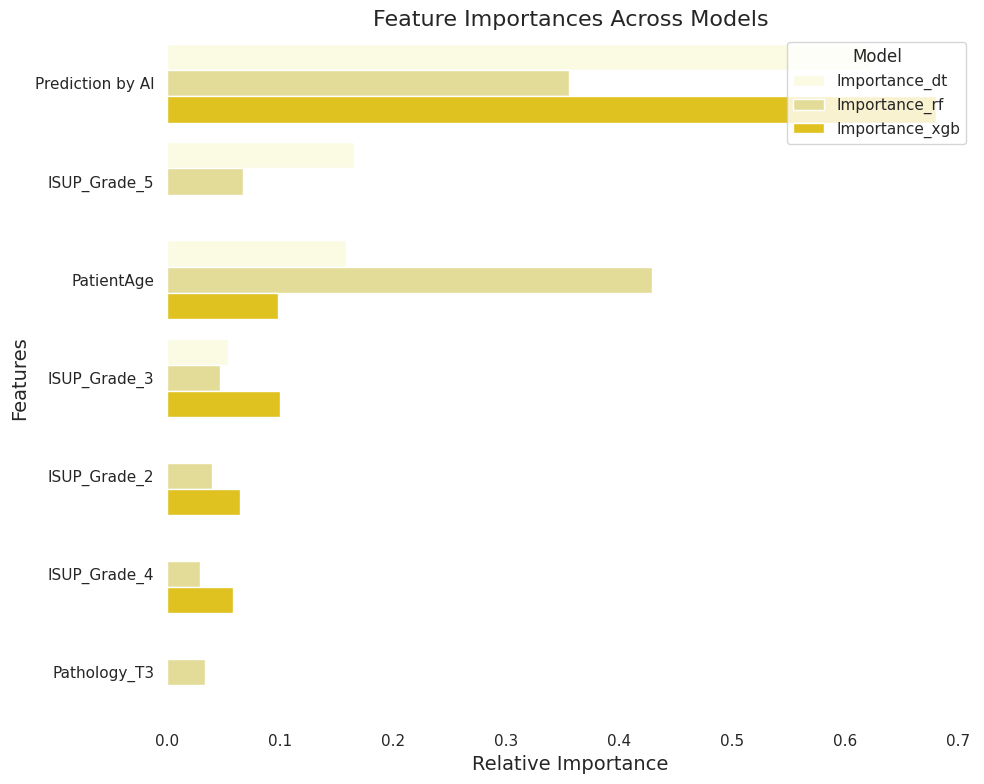

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette in shades of yellow
palette = {
    'Importance_dt': 'lightyellow',  # A light yellow color
    'Importance_rf': 'khaki',  # A khaki color that is a bit darker
    'Importance_xgb': 'gold'  # A darker, golden yellow color
}

# Plot
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=16)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.legend(title='Model', loc='upper right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_inAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


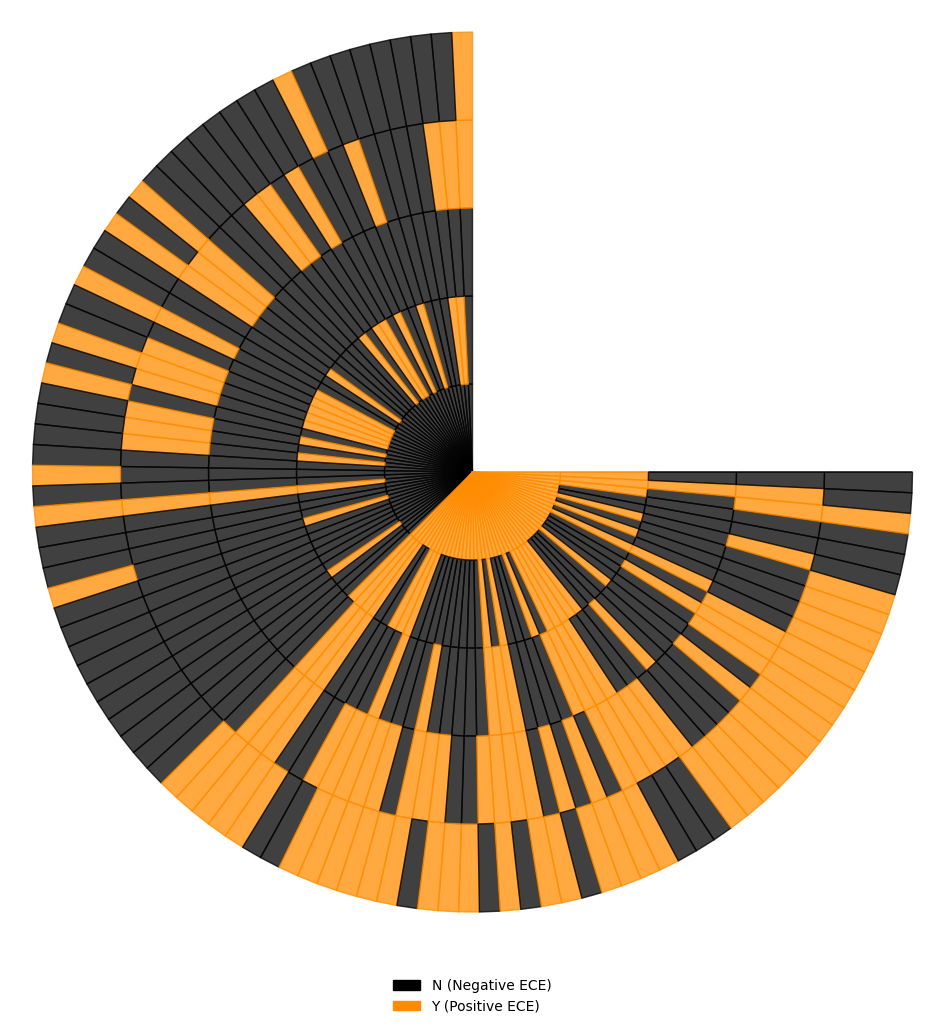

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# Load your data
data = pd.read_excel('/content/data_circle.xlsx')  # Update the file name if needed


# Function to assign colors based on 'Y' or 'N'
def get_color(value):
    if value == '0':
        return 'black'  # Color for 'N'
    elif value == '1':
        return 'darkorange'  # Color for 'Y'
    return 'white'  # Fallback color (ideally unused)

# Function to clean data and convert predictions to 'Y' or 'N' values
def predictions_to_binary(df):
    binary_matrix = df.iloc[:, 1:]
    binary_matrix = binary_matrix.fillna('NA')
    binary_matrix = binary_matrix.applymap(lambda x: '0' if x == 'N' else '1')
    return binary_matrix

binary_prediction = predictions_to_binary(data)

# Updated order of predictions, with AI first and Ground Truth last (to be innermost)
comparison_cols = ['Prediction by AI', 'Prediction by Rad 1', 'Prediction by Rad 2', 'Prediction by Rad 3', 'Ground Truth']

# Prepare the data, including the 'Ground Truth' at the end for plotting last
binary_matrix = predictions_to_binary(data)


start_angle = 90
end_angle = start_angle + 270
angles = np.linspace(np.deg2rad(start_angle), np.deg2rad(end_angle), len(binary_matrix) + 1)

# Plot the circular heatmap
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
# Adjust the radii to place Ground Truth on the outside, followed by AI and radiologists
radii = np.arange(len(comparison_cols) + 2)  # Plus 2 for Ground Truth and proper spacing

for case_idx in range(len(binary_matrix)):
    for prediction_idx, column in reversed(list(enumerate(comparison_cols))):
        value = binary_matrix.iloc[case_idx, prediction_idx]
        color = get_color(value)
        theta_range = angles[case_idx:case_idx + 2]
        # Adjusting the radii based on reversed order
        r_inner = radii[len(comparison_cols) - prediction_idx - 1]
        r_outer = radii[len(comparison_cols) - prediction_idx]
        ax.fill_between(theta_range, r_inner, r_outer, color=color, alpha=0.75)

# Commented out the call to add labels inside the circles
# add_aligned_labels(ax, comparison_cols, start_angle, end_angle)

# Add a legend
blue_patch = Patch(color='black', label='N (Negative ECE)')
red_patch = Patch(color='darkorange', label='Y (Positive ECE)')
ax.legend(handles=[blue_patch, red_patch], loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False)

# Final adjustments
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['polar'].set_visible(False)  # Hide the outer circle

plt.savefig('/content/circularHeatmap.pdf', format='pdf', bbox_inches='tight')

plt.show()

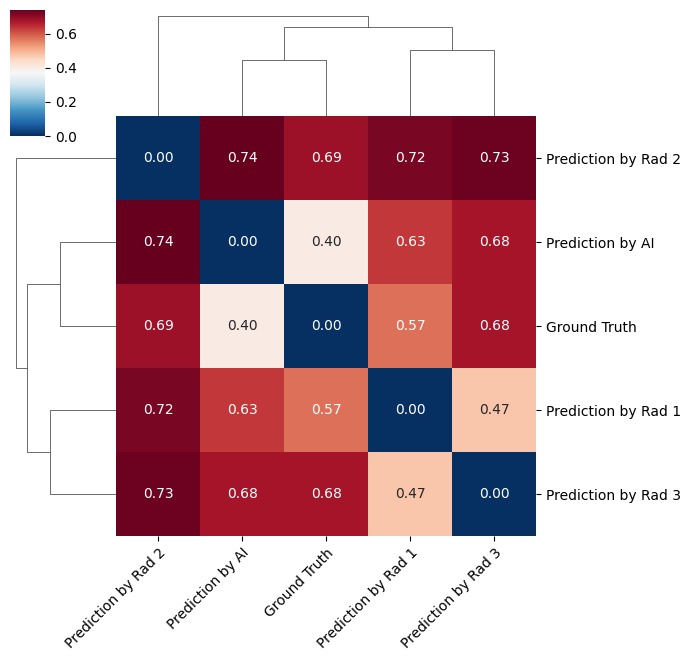

In [2]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

data_path = '/content/data_dendro.xlsx'
data = pd.read_excel(data_path)

# Assuming "Ground Truth" is a column you want to include in the heatmap.
data['Name'] = data.index  # Adjust if you have a specific column for case names/IDs
clustering_data = data.set_index('Name').T  # Transpose so entities are rows

# Calculate the pairwise Jaccard distances
jaccard_distances = pdist(clustering_data, metric='jaccard')

# Hierarchical clustering
row_linkage = linkage(jaccard_distances, method='average')

# Create a clustered heatmap with dendrogram
g = sns.clustermap(squareform(jaccard_distances), row_linkage=row_linkage, col_linkage=row_linkage,
                   cmap="RdBu_r", figsize=(7, 7), annot=True, fmt=".2f",
                   xticklabels=clustering_data.index, yticklabels=clustering_data.index)

# Improve readability of labels
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", color="black")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, color="black")

# Save the figure
plt.savefig('/content/Dendrogram.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [6]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load the data
data_path = '/content/data_dendro.xlsx'
data = pd.read_excel(data_path)

# Adjust the entities list to match your column names
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3'
]

# Check if all specified columns are present in the DataFrame
missing_columns = [entity for entity in entities + ['Ground Truth'] if entity not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the data: {missing_columns}")

# Initialize a list to store Cohen's Kappa scores
kappa_scores = []

# Calculate Cohen's Kappa for each entity against the "Ground Truth"
for entity in entities:
    score = cohen_kappa_score(data[entity], data['Ground Truth'])
    kappa_scores.append((entity, score))

# Convert to DataFrame for easier visualization
kappa_df = pd.DataFrame(kappa_scores, columns=['Entity', 'Cohen\'s Kappa'])

# Display the results
print(kappa_df)


                Entity  Cohen's Kappa
0     Prediction by AI           0.52
1  Prediction by Rad 1           0.22
2  Prediction by Rad 2           0.30
3  Prediction by Rad 3           0.08


In [9]:
# Import the necessary library
import pandas as pd

data_path = '/content/data_dendro.xlsx'

# Load the data
data = pd.read_excel(data_path)

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# List of entities (predictions) to compare against the Ground Truth
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3'
]

# Calculate accuracy for each entity against the "Ground Truth"
for entity in entities:
    correct_predictions = (data[entity] == data['Ground Truth']).sum()
    total_predictions = len(data)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracy_scores[entity] = accuracy

# Convert to DataFrame for easier visualization
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Entity', 'Accuracy'])

# Display the accuracy scores
print(accuracy_df)


                Entity  Accuracy
0     Prediction by AI      76.0
1  Prediction by Rad 1      61.0
2  Prediction by Rad 2      65.0
3  Prediction by Rad 3      54.0


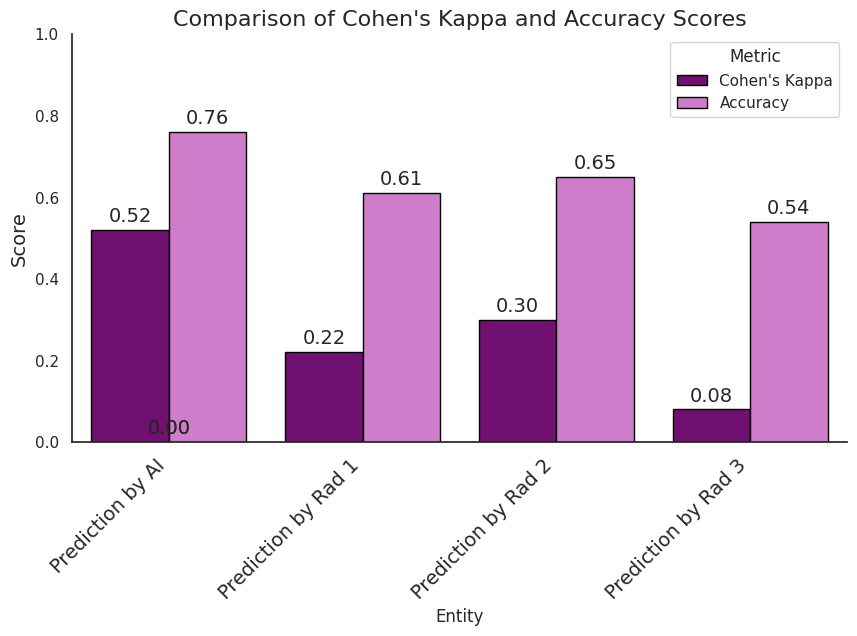

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

data_path = '/content/data_dendro.xlsx'

# Load the data
data = pd.read_excel(data_path)

# List of entities to calculate metrics for
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3'
]

# Initialize lists to store metrics
metrics_scores = []

# Calculate Cohen's Kappa and accuracy for each entity
for entity in entities:
    kappa_score = cohen_kappa_score(data[entity], data['Ground Truth'])
    correct_predictions = (data[entity] == data['Ground Truth']).sum()
    # Keep accuracy between 0 and 1
    accuracy = correct_predictions / len(data)
    metrics_scores.append((entity, 'Cohen\'s Kappa', kappa_score))
    metrics_scores.append((entity, 'Accuracy', accuracy))

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(metrics_scores, columns=['Entity', 'Metric', 'Score'])

# Visualization
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
sns.set_style("white", {'axes.grid': False})

# Define the pink and purple color palette
colors = ["#800080", "#DA70D6"]  # Purple and pink

# Create the bar plot with hue for differentiating metrics, using the specified colors
barplot = sns.barplot(x='Entity', y='Score', hue='Metric', data=metrics_df, edgecolor='black', linewidth=1, palette=colors)

plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Adjust y-axis limit to accommodate scores between 0 and 1
plt.ylim(0, 1)

# Adding text on top of each bar for readability
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14)

sns.despine()
plt.subplots_adjust(bottom=0.20)
plt.title('Comparison of Cohen\'s Kappa and Accuracy Scores', fontsize=16)

plt.savefig('/content/plot.pdf', format='pdf', bbox_inches='tight')

plt.show()


